<a href="https://colab.research.google.com/github/gaurigawali15/Brochure_OasisInfobyte/blob/main/lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lab - 3, AI Ethics
### Bias detection in historical data analyze the dataset to identify sorce of bias such as underrepresentation of groups

In [ ]:
# OMI SINGH, 20220802253
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('Financial_Loan_Access_Dataset.csv')
df.head()

,ID,Gender,Race,Age,Age_Group,Income,Credit_Score,Loan_Amount,Employment_Type,Education_Level,Citizenship_Status,Language_Proficiency,Disability_Status,Criminal_Record,Zip_Code_Group,Loan_Approved
0,415,Female,White,62,Over 60,90470,790,100269,Full-time,Bachelor's,Citizen,Fluent,No,No,Urban Professional,Approved
1,334,Male,White,49,25-60,106317,615,278731,Full-time,Bachelor's,Citizen,Fluent,No,No,Urban Professional,Approved
2,4658,Female,Hispanic,58,25-60,96596,698,414326,Full-time,Some College,Citizen,Fluent,Yes,No,Urban Professional,Approved
3,1794,Female,White,41,25-60,69501,840,414801,Part-time,Graduate,Citizen,Fluent,No,No,Urban Professional,Denied
4,9101,Male,White,32,25-60,128322,779,298557,Full-time,Some College,Citizen,Fluent,No,No,High-income Suburban,Approved


#### Lets group by gender and check approval rate

In [ ]:
# OMI SINGH, 20220802253
df['Approved'] = df['Loan_Approved'].map({'Approved' : 1, 'Denied' : 0})
df.groupby('Gender')['Approved'].mean()

Gender
Female        0.406996
Male          0.459836
Non-binary    0.342105
Name: Approved, dtype: float64

### This has potential bias which we need to confirm.

##### Lets study the other features based on <u>gender</u> to see if this has affected their approval rates.

In [ ]:
df.groupby('Gender').size()

Gender
Female        3688
Male          3660
Non-binary     152
dtype: int64

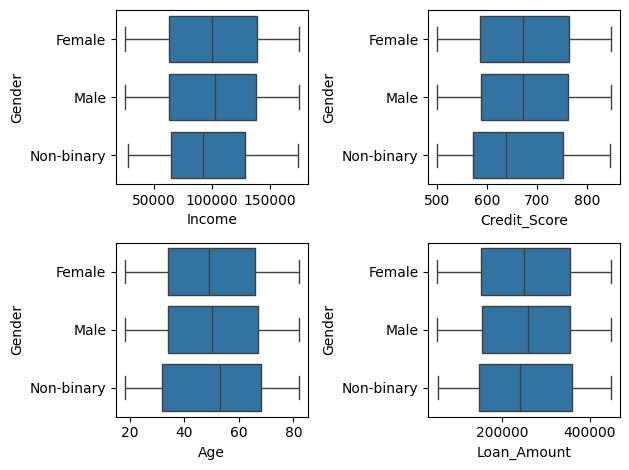

In [ ]:
# OMI SINGH, 20220802253
from matplotlib import pyplot as plt
import seaborn as sns
plt.subplot(2, 2, 1)
sns.boxplot(x = df['Income'], y=df['Gender'])
plt.subplot(2, 2, 2)
sns.boxplot(x = df['Credit_Score'], y=df['Gender'])
plt.subplot(2, 2, 3)
sns.boxplot(x = df['Age'], y=df['Gender'])
plt.subplot(2, 2, 4)
sns.boxplot(x = df['Loan_Amount'], y=df['Gender'])
plt.tight_layout()
plt.show()

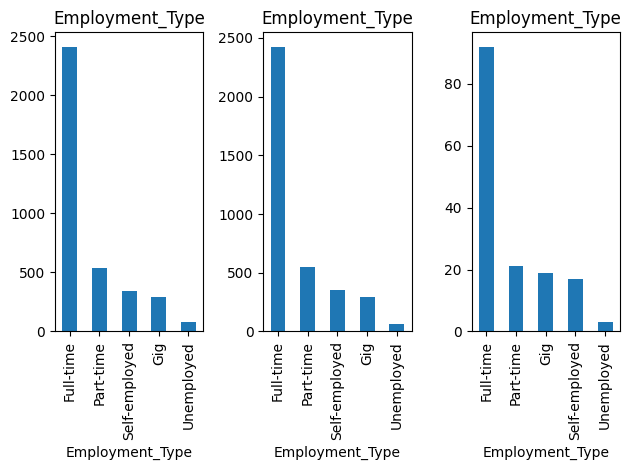

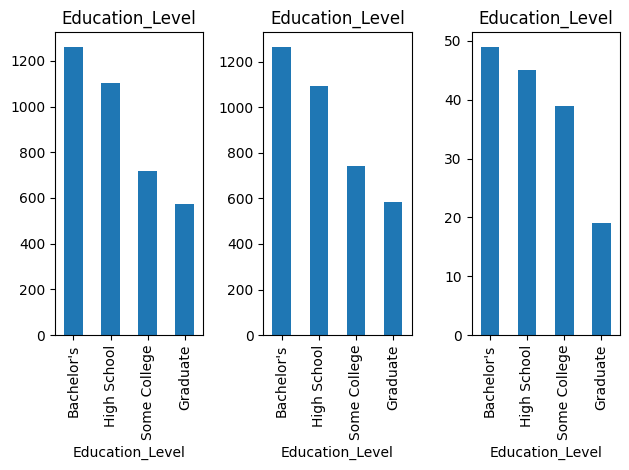

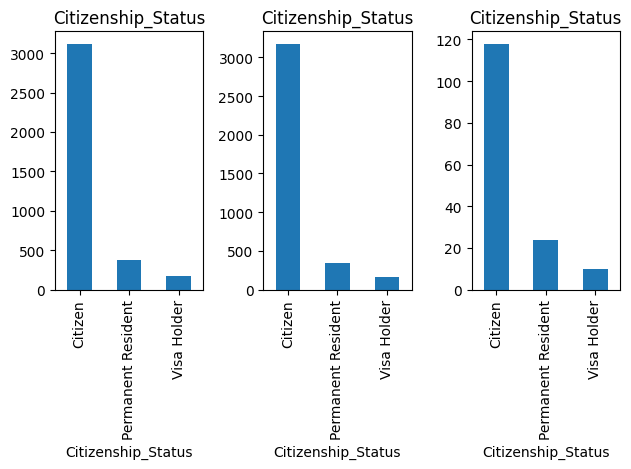

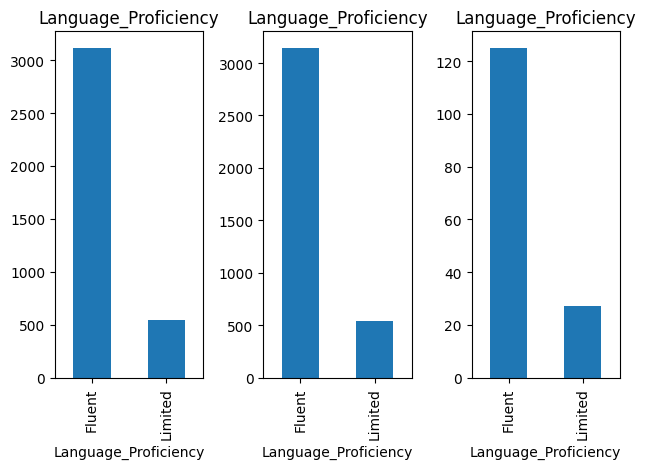

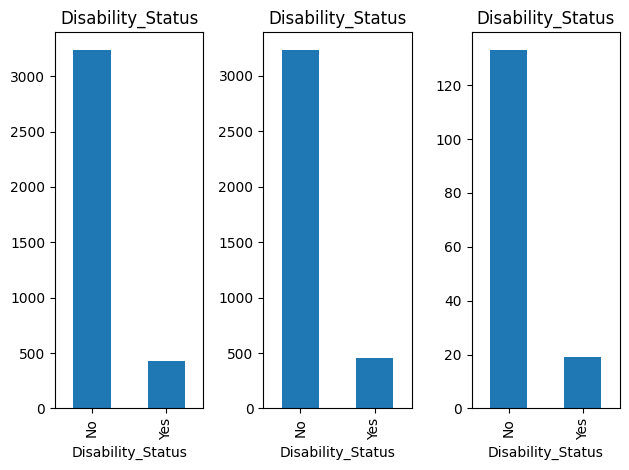

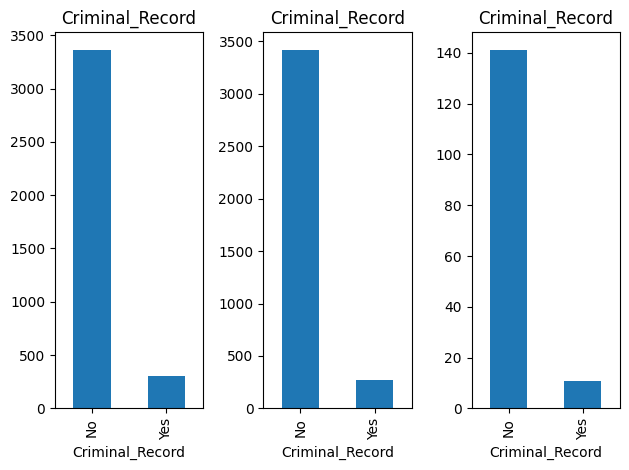

In [ ]:
# OMI SINGH, 20220802253
genders = ['Male', 'Female', 'Non-binary']
columns = ['Employment_Type','Education_Level','Citizenship_Status','Language_Proficiency','Disability_Status','Criminal_Record']
for j in columns:
    for i in range(len(genders)):
        plt.subplot(1, 3, i + 1)
        df[df['Gender'] == genders[i]][j].value_counts().plot(kind = 'bar')
        plt.title(j)
        plt.tight_layout()
    plt.show()

### Observation -

The distribution of various features including Employment_Type, Education_Level, Citizenship_Status, Language_Proficiency, Disability_Status, Criminal_Record
Age, Income, Credit Score and Loan Amount, as well as the population size show about the same distribution for both Male and Female Genders.

It is, however, less for Non-Binary.

**If all the features show a similar distribution for both groups, the loan approval rates must also be similar.**

Unless there is a bias in the data collection, we have a loan approval system that is biased by gender.

We can do a chi-squared test for independence.
1) Construct the contingency table - the frequency table of Gender vs Loan Approved

In [ ]:
# OMI SINGH, 20220802253
contingency = pd.crosstab(df['Gender'], df['Loan_Approved'])

2. Compute chi2_contingency, where we test for independence.
3. Here, our null hypothesis is that Loan Approval is independent of bias, and our alternate hypothesis is that they are dependent.

In [ ]:
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(contingency)
print(f"p-value={p}")

p-value=2.306667229244067e-06


The p-value obtains tells us about the independence.

We can see it is less than 0.5. Hence, we can conclude that Loan Approval is dependent on Gender.